In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
path = './data/raw_data.csv'
df = pd.read_csv(path)
df.head()

Phone_Number      Poster  No_Bedroom  No_Bathroom  No_Livingroom  Area  \
0    098285***   m√¥i gi·ªõi          3.0          2.0            1.0  80.0   
1    088833***    c√° nh√¢n          2.0          1.0            NaN  48.0   
2    098441***    c√° nh√¢n          1.0          1.0            NaN  40.0   
3    091552***   m√¥i gi·ªõi          1.0          1.0            NaN  30.0   
4    091552***   m√¥i gi·ªõi          1.0          1.0            NaN  30.0   

     Apartment_Type Project  Investor  Floor   Furniture_Type  \
0           t·∫≠p th·ªÉ     NaN       NaN    3.0              NaN   
1          chung_c∆∞     NaN       NaN    NaN              NaN   
2  t·∫≠p_th·ªÉ chung_c∆∞     NaN       NaN    NaN              NaN   
3            studio     NaN       NaN    NaN  n·ªôi th·∫•t ƒë·∫ßy ƒë·ªß   
4          chung_c∆∞     NaN       NaN    2.0  n·ªôi th·∫•t ƒë·∫ßy ƒë·ªß   

                                           FURNITURE  \
0  ['c√≥_ƒëi·ªÅu ho√†', ' n√≥ng l·∫°nh', ' gi∆∞·ªùng', ' t·ªß'...   
1                                                 []   
2                                                 []   
3  ['ƒëi·ªÅu_ho√†', 'gi∆∞·ªùng t·ªß', 'n√≥ng l·∫°nh', 'b√†n b·∫ø...   
4  ['ƒëi·ªÅu_ho√†', ' gi∆∞·ªùng t·ªß', 'n√≥ng l·∫°nh', ' b√†n ...   

                                          Convenient Price  \
0                                                 []   7.5   
1                 ['tr∆∞·ªùng', 'ƒë·∫°i_h·ªçc', 'b·ªánh_vi·ªán']   7.5   
2                          ['ng√µ r·ªông', 'b·ªánh_vi·ªán']   5.0   
3                           ['trung_t√¢m th∆∞∆°ng_m·∫°i']   4.5   
4  ['xe ƒë·ªÉ d∆∞·ªõi h·∫ßm free', 'c·ªïng kho√° v√¢n tay', '...   4.5   

                                                 Url  \
0  https://nha.chotot.com/ha-noi/quan-ba-dinh/thu...   
1  https://nha.chotot.com/ha-noi/quan-dong-da/thu...   
2  https://nha.chotot.com/ha-noi/quan-hai-ba-trun...   
3  https://nha.chotot.com/ha-noi/quan-ba-dinh/thu...   
4  https://nha.chotot.com/ha-noi/quan-ba-dinh/thu...   

                                     Raw_Description  \
0  ch√≠nh ch·ªß cho thu√™ cƒÉn h·ªô 3 m·∫∑t tho√°ng t·∫°i vƒ©n...   
1  cho thu√™ cƒÉn h·ªô chung c∆∞  ch√≠nh ch·ªß, m·∫∑t ƒë∆∞·ªùng...   
2  ch√≠nh ch·ªß cho thu√™ cƒÉn h·ªô t·∫≠p th·ªÉ 8/3 nh√† a6, ...   
3  studio 25m2 t·∫°i ng√µ 118 ƒë√†o t·∫•n\nnh√† full n·ªôi ...   
4  cho thu√™ cƒÉn h·ªô d·ªãch v·ª• ƒë·ªß ƒë·ªì gi√° ch·ªâ 4tr5 ·ªü ƒë...   

                                            Entities  \
0  [['<unk> ph√∫c ti·ªán', 'LOC'], ['80', 'AREA'], [...   
1  [['cƒÉn_h·ªô chung_c∆∞', 'APART'], ['ƒë∆∞·ªùng ph·∫°m ng...   
2  [['cƒÉn_h·ªô t·∫≠p_th·ªÉ', 'APART'], ['nh√† a6, t·∫ßng 1...   
3  [['studio', 'APART'], ['25m2', 'AREA'], ['ng√µ ...   
4  [['cƒÉn_h·ªô d·ªãch_v·ª•', 'APART'], ['45 ·ªü ƒë√†o', 'PR...   

                                            Location   Latitude   Longitude  
0                Vƒ©nh Ph√∫c, Ba ƒê√¨nh, H√† N·ªôi, Vietnam  21.041731  105.809950  
1        P.Ph·∫°m Ng·ªçc Th·∫°ch, ƒê·ªëng ƒêa, H√† N·ªôi, Vietnam  21.008615  105.834091  
2  104 A6 Ph·ªë 8/3, Qu·ª≥nh Mai, Hai B√† Tr∆∞ng, H√† N·ªô...  20.999548  105.860602  
3                  ƒê√†o T·∫•n, Ba ƒê√¨nh, H√† N·ªôi, Vietnam  21.032594  105.808742  
4  Ng. 12 Ph·ªë ƒê√†o T·∫•n, C·ªëng V·ªã, Ba ƒê√¨nh, H√† N·ªôi, ...  21.033861  105.809472

In [3]:
df.shape

(16916, 20)

In [4]:
df.rename(columns={'FURNITURE': 'Furniture'}, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16916 entries, 0 to 16915
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Phone_Number     16840 non-null  object 
 1   Poster           16916 non-null  object 
 2   No_Bedroom       16764 non-null  float64
 3   No_Bathroom      10843 non-null  float64
 4   No_Livingroom    3945 non-null   float64
 5   Area             16916 non-null  object 
 6   Apartment_Type   12151 non-null  object 
 7   Project          12650 non-null  object 
 8   Investor         0 non-null      float64
 9   Floor            5596 non-null   float64
 10  Furniture_Type   10944 non-null  object 
 11  Furniture        16916 non-null  object 
 12  Convenient       16916 non-null  object 
 13  Price            16740 non-null  object 
 14  Url              16916 non-null  object 
 15  Raw_Description  16684 non-null  object 
 16  Entities         16916 non-null  object 
 17  Location    

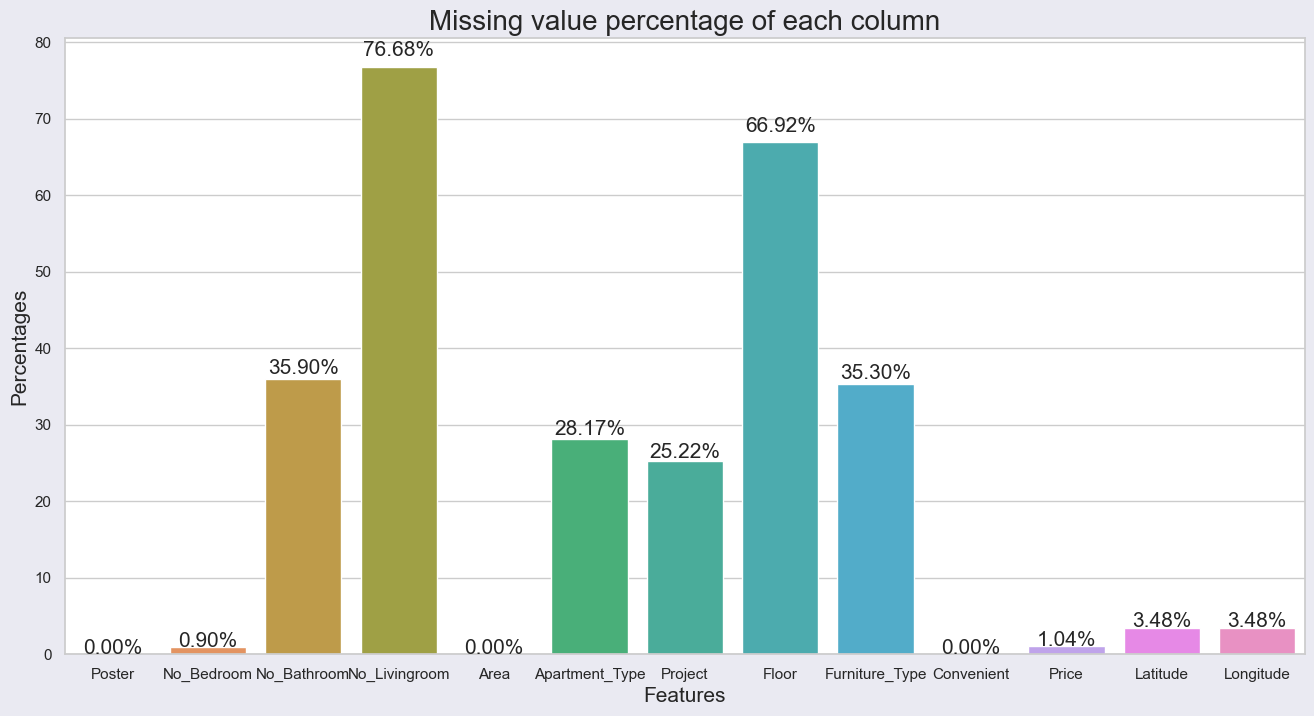

In [6]:
# visualize percentage of missing value
def missing_percent(df):
    nan_percent= 100 * (df.isnull().sum()/len(df))
    # nan_percent= nan_percent[nan_percent>0]
    return nan_percent

nan_percent= missing_percent(df)
nan_percent

bar_x = []
bar_y = []
for x in list(nan_percent.items()):
  if x[0] not in ['Investor', 'Phone_Number', 'Raw_Description', 'Location', 'Furniture', 'Convinient', 'Entities', 'Url']:
    bar_x.append(x[0])
    bar_y.append(x[1])

sns.set(style='whitegrid')
facecolor = '#eaeaf2'
fig, ax = plt.subplots(figsize=(16, 8), facecolor=facecolor)
ax = sns.barplot(x=bar_x, y = bar_y)
ax.set_title('Missing value percentage of each column', fontsize=20)
ax.set_xlabel('Features', fontsize=15)
ax.set_ylabel('Percentages', fontsize=15)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height*1.02), ha='center', fontsize=15)

## Furniture feature

In each feature, I will visualize to get insight of the feature, then take account into some processes to clean data, handle missing value, instead of split project into separate steps such as: EDA, Data Preprocess,...

In [7]:
df['Furniture_Type'].isnull().sum()

5972

Text(0, 0.5, 'Furniture_Type')

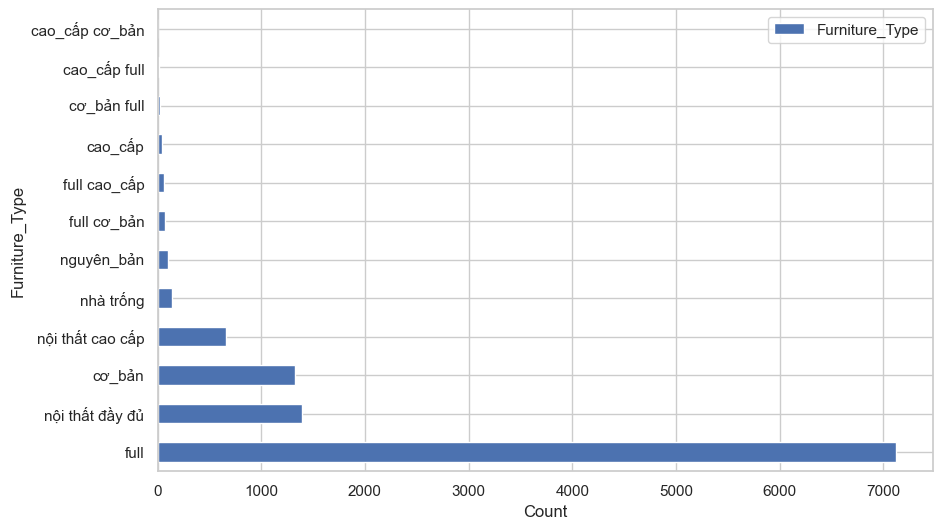

In [8]:
df['Furniture_Type'].value_counts().to_frame().plot.barh(figsize=(10, 6))
plt.xlabel('Count')
plt.ylabel('Furniture_Type')

# cao_c·∫•p c∆°_b·∫£n == basic luxury
# cao_c·∫•p full == full luxury
# c∆°_b·∫£n full == full basic
# cao_c·∫•p == luxury
# full cao_c·∫•p == cao_c·∫•p full == full luxury
# full c∆°_b·∫£n == c∆°_b·∫£n full == full basic
# nguy√™n_b·∫£n == origin
# nh√† tr·ªëng == empty
# n·ªôi th·∫•t cao c·∫•p == luxury
# c∆°_b·∫£n == basic
# n·ªôi th·∫•t ƒë·∫ßy ƒë·ªß  == full
# Some duplicate furniture type in the dataset i.e. full cao_c·∫•p == cao_c·∫•p full, full c∆°_b·∫£n == c∆°_b·∫£n full, ...

In [9]:
# normalize furniture type into consistent list
for i in range(df.shape[0]):
  temp = str(df.iloc[i]['Furniture_Type'])
  if temp == 'c∆°_b·∫£n' or temp == 'c∆° b·∫£n' or temp == 'full c∆°_b·∫£n' or temp == 'full c∆° b·∫£n' or temp == 'c∆°_b·∫£n full':
      df['Furniture_Type'][i] = 'c∆° b·∫£n'
  if temp == 'nh√† tr·ªëng':
      df['Furniture_Type'][i] = 'nguy√™n b·∫£n'
  if temp == 'nguy√™n_b·∫£n' or temp == 'nguy√™n b·∫£n':
      df['Furniture_Type'][i] = 'nguy√™n b·∫£n'
  if temp == 'n·ªôi th·∫•t cao c·∫•p' or temp == 'full cao_c·∫•p' or temp == 'cao_c·∫•p' or temp == 'cao_c·∫•p full' or temp == 'cao_c·∫•p c∆°_b·∫£n':
      df['Furniture_Type'][i] = 'full cao c·∫•p'
  if temp == 'n·ªôi th·∫•t ƒë·∫ßy ƒë·ªß':
      df['Furniture_Type'][i] = 'full'

In [10]:
# raw description contains a lot of information. So, we can extract some information about furniture type from them
for i in range(df.shape[0]):
  if isinstance(df.iloc[i]['Furniture_Type'], float):
    temp = str(df.iloc[i]['Entities']) + str(df.iloc[i]['Raw_Description']) + str(df.iloc[i]['Project'])
    if 'c∆°_b·∫£n' in temp or 'c∆° b·∫£n' in temp or 'full c∆°_b·∫£n' in temp or 'full c∆° b·∫£n' in temp or 'c∆°_b·∫£n full' in temp:
        df['Furniture_Type'][i] = 'c∆° b·∫£n'
    elif 'nh√† tr·ªëng' in temp:
        df['Furniture_Type'][i] = 'nguy√™n b·∫£n'
    elif 'nguy√™n_b·∫£n' in temp or 'nguy√™n b·∫£n' in temp:
        df['Furniture_Type'][i] = 'nguy√™n b·∫£n'
    elif 'n·ªôi th·∫•t cao c·∫•p' in temp  or 'full cao_c·∫•p' in temp or 'cao_c·∫•p' in temp or 'cao_c·∫•p full' in temp or 'cao_c·∫•p c∆°_b·∫£n' in temp:
        df['Furniture_Type'][i] = 'full cao c·∫•p'
    elif 'n·ªôi th·∫•t ƒë·∫ßy ƒë·ªß' in temp:
        df['Furniture_Type'][i] = 'full'

In [11]:
# fill missing value by "unk" value
df['Furniture_Type'].fillna('unk', inplace=True)

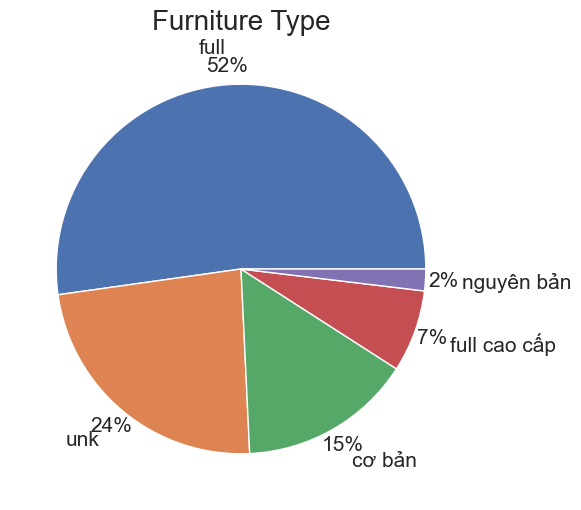

In [12]:
plt.subplots(figsize=(10,6))
df['Furniture_Type'].value_counts().plot(kind='pie', autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2, fontsize=15)
plt.axis('off')
plt.title('Furniture Type', fontsize=20)
plt.show()

## Area and Price Feature

In [13]:
# unit of price: million vietnamdong
# unit or area: square meter
# there are some text values in area and price feature
# so, need to process to extract number from the text values

import string
punc = list(string.punctuation.replace(',','').replace('.','') + 'abcdefghyklmnopqrstuvwxyz')
for i in range(df.shape[0]):
    if any(p in str(df['Area'][i]) for p in punc):
        print(df['Area'][i])
        #drop wrong label
        df['Area'] = df['Area'].drop(index=i)
for i in range(df.shape[0]):
    if any(p in str(df['Price'][i]) for p in punc):
        print(df['Price'][i])

05/12/20
05/12/20
05/12/20
30/11/20
05/12/20
04/12/20
30/11/20
04/12/20
03/12/20
03/12/20
30/11/20
03/12/20
03/12/20
03/12/20
29/11/20
29/11/20
nan
['8,5 tri·ªáuth√°', 'PRICE']
nan
['7,5 tri·ªáu', 'PRICE']
nan
nan
['9xx/ng√†y', 'PRICE']
['8.25 k/m2/', 'PRICE']
['2.5 tr - 4.5 tr/th√°ng', 'PRICE']
['2.5 tr - 4.5 tr/th', 'PRICE']
['2.5 tr - 4.5 tr/th√°', 'PRICE']
nan
['8 tri·ªáu ƒë·∫øn 16 tri·ªáu/th', 'PRICE']
['2.5 tr - 4.5 tr/th√°', 'PRICE']
nan
nan
nan
['17 ~ tri·ªá', 'PRICE']
nan
['4tr5 ƒë·∫øn 6tr', 'PRICE']
['5 - 12 tri·ªáu/', 'PRICE']
nan
['15 tri·ªáu/th√°ng', 'PRICE']
['9 tri·ªáu/th√°ng.', 'PRICE']
nan
['5.5 tri·ªáu/th√°', 'PRICE']
['8.25 k/m2/', 'PRICE']
['2.5 tr - 4.5 tr/th√°ng', 'PRICE']
['2.5 tr - 4.5 tr/th', 'PRICE']
['2.5 tr - 4.5 tr/th√°', 'PRICE']
nan
['8 tri·ªáu ƒë·∫øn 16 tri·ªáu/th', 'PRICE']
['2.5 tr - 4.5 tr/th√°', 'PRICE']
nan
nan
nan
['17 ~ tri·ªá', 'PRICE']
nan
['4tr5 ƒë·∫øn 6tr', 'PRICE']
['5 - 12 tri·ªáu/', 'PRICE']
nan
['15 tri·ªáu/th√°ng', 'PRICE']
['9 tri·ªáu/th

In [14]:
import re
def convert_obj_to_float(df, field):
    form = "[+-]?(\d+(\.\d*)?|\.\d+)([eE][+-]?\d+)?"
    for i in range(df.shape[0]):
        if isinstance(df[field][i], str):
            temp = re.findall(form, df[field][i].replace(',','.').replace('m2','').replace(' tr ','.').replace('tr','.').replace('00.000','.'))
            if not len(temp):
                df[field] = df[field].drop(index=i)
            else:
                temp_ = 0.0
                for t in temp:
                    temp_ += float(t[0])
                df[field][i] = temp_/len(temp)
        if isinstance(df[field][i], int):
            df[field][i] = float(df[field][i])
    df[field] = df[field].astype('float')
convert_obj_to_float(df, 'Price')
convert_obj_to_float(df, 'Area')

In [15]:
df['Price'].isnull().sum()

192

In [16]:
df['Area'].isnull().sum()

16

In [17]:
df[['Price', 'Area']].describe()

Price          Area
count   16724.000000  16900.000000
mean       58.358730     74.482237
std      6226.249488     33.162276
min         0.625000      1.000000
25%         6.500000     50.000000
50%         9.000000     72.000000
75%        12.000000     93.000000
max    805194.333333    826.000000

In [18]:
df['Price'].describe()

count     16724.000000
mean         58.358730
std        6226.249488
min           0.625000
25%           6.500000
50%           9.000000
75%          12.000000
max      805194.333333
Name: Price, dtype: float64

Text(0.5, 1.0, 'Box plot of price')

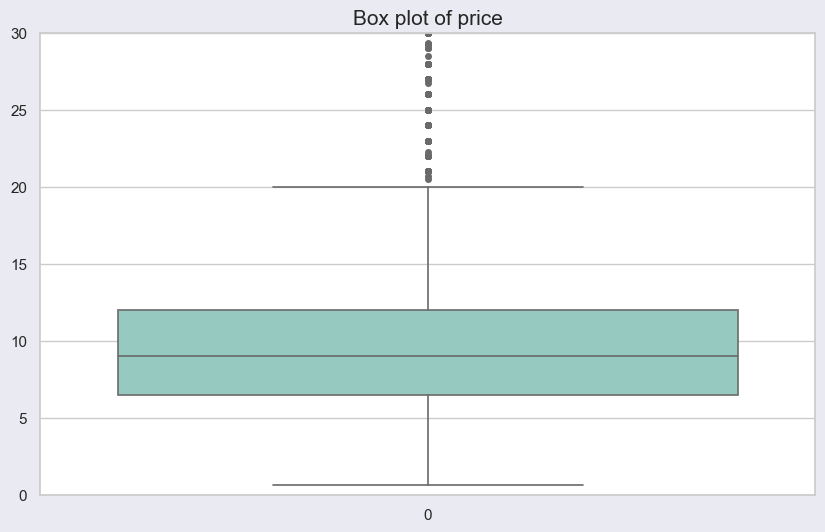

In [19]:
# visualize boxplot of price
sns.set(style='whitegrid')
facecolor = '#eaeaf2'
fig, ax = plt.subplots(figsize=(10, 6), facecolor=facecolor)

ax = sns.boxplot(data=df['Price'],
                 palette='Set3',
                 linewidth=1.2,
                 fliersize=2,
                 showmeans=True,
                 flierprops=dict(marker='o', markersize=4))
ax.set(ylim=(0, 30))
ax.set_title('Box plot of price', fontsize=15)

In [20]:
df.query('Price >= 20')

Phone_Number      Poster  No_Bedroom  No_Bathroom  No_Livingroom   Area  \
9        090455***   m√¥i gi·ªõi          3.0          2.0            NaN  118.0   
196      052298***    c√° nh√¢n          3.0          2.0            NaN  136.0   
221      035442***   m√¥i gi·ªõi          2.0          2.0            NaN   74.0   
319      083868***   m√¥i gi·ªõi          3.0          2.0            NaN  115.0   
343      032616***    c√° nh√¢n          3.0          3.0            NaN  220.0   
...            ...         ...         ...          ...            ...    ...   
16697   0982100***    m√¥i gi·ªõi         3.0          NaN            NaN  130.0   
16808   0919991***    m√¥i gi·ªõi         2.0          NaN            NaN  115.0   
16814   0355638***    m√¥i gi·ªõi         3.0          2.0            NaN  130.0   
16832   0937682***    m√¥i gi·ªõi         3.0          NaN            NaN  130.0   
16914   0327582***    m√¥i gi·ªõi         2.0          NaN            NaN   85.0   

         Apartment_Type                                            Project  \
9              chung c∆∞            vinhomes times city - park hill premium   
196            chung c∆∞                        king palace 108 nguy·ªÖn tr√£i   
221            chung c∆∞                                vinhomes metropolis   
319            chung_c∆∞                        king palace 108 nguy·ªÖn tr√£i   
343            chung_c∆∞                             vincom center b√† tri·ªáu   
...                 ...                                                ...   
16697  cao_c·∫•p chung_c∆∞             cƒÉn h·ªô chung c∆∞ the lancaster n√∫i tr√∫c   
16808          chung_c∆∞                                     mandrin garden   
16814  cao_c·∫•p chung_c∆∞                         cƒÉn h·ªô chung c∆∞ the legacy   
16832               NaN              nh√† ph·ªë grandeur palace 138b gi·∫£ng v√µ   
16914          chung_c∆∞  khu ph·ª©c h·ª£p discovery central (discovery comp...   

       Investor  Floor Furniture_Type  \
9           NaN    NaN           full   
196         NaN    8.0   full cao c·∫•p   
221         NaN    NaN           full   
319         NaN    NaN   full cao c·∫•p   
343         NaN   10.0           full   
...         ...    ...            ...   
16697       NaN   15.0   full cao c·∫•p   
16808       NaN    NaN           full   
16814       NaN   16.0           full   
16832       NaN   25.0           full   
16914       NaN    NaN         c∆° b·∫£n   

                                               Furniture  \
9                                                     []   
196                                                   []   
221                                                   []   
319                                                   []   
343                                                   []   
...                                                  ...   
16697  ['ƒëi·ªÅu_ho√†', 'm√°y_gi·∫∑t', 't·ªß', 'c√¢y_n∆∞·ªõc n√≥ng ...   
16808  ['sofa', ' tivi', ' t·ªß_l·∫°nh', ' m√°y_gi·∫∑t', ' g...   
16814                                                 []   
16832                                                 []   
16914  ['ƒëi·ªÅu_ho√†', ' n√≥ng l·∫°nh', ' t·ªß √¢m t∆∞·ªùng', ' k...   

                                              Convenient  Price  \
9                                                     []   21.0   
196    ['thang_m√°y', 'an_ninh t·ªët', 'b·∫£o_v·ªá 24/24', '...   23.0   
221                                      ['slot xe √¥t√¥']   22.0   
319                                                   []   20.0   
343                                                   []   46.0   
...                                                  ...    ...   
16697  ['s·∫£nh l·ªÖ_t√¢n', 'b·ªÉ_b∆°i', 'an_ninh', 'khu th∆∞∆°...   25.0   
16808                                                 []   23.0   
16814  ['ƒë·ªß c√°c ti·ªán_√≠ch cao_c·∫•p √¢', 'giao_th√¥ng th√¥n...   25.0   
16832                                                 []   40.0   
1

Text(0.5, 1.0, 'Box plot of Area')

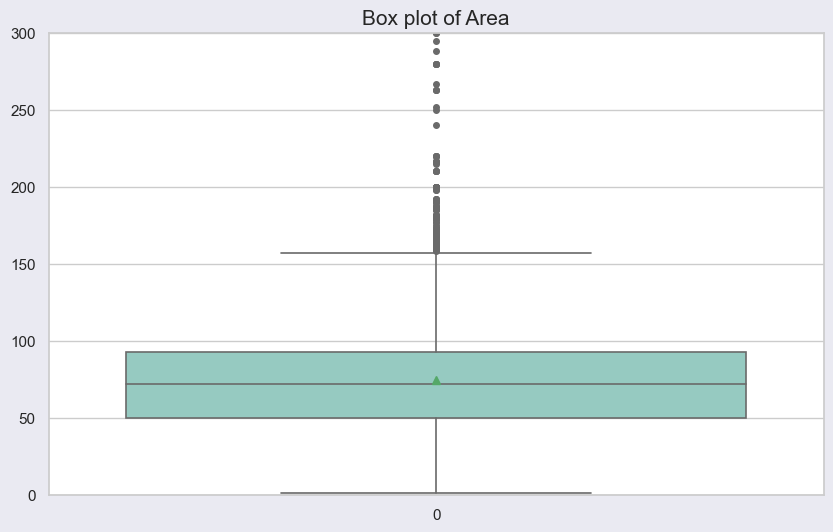

In [21]:
#  visualize boxplot of area feature
sns.set(style='whitegrid')
facecolor = '#eaeaf2'
fig, ax = plt.subplots(figsize=(10, 6), facecolor=facecolor)

ax = sns.boxplot(data=df['Area'],
                 palette='Set3',
                 linewidth=1.2,
                 fliersize=2,
                 showmeans=True,
                 flierprops=dict(marker='o', markersize=4))
ax.set(ylim=(0, 300))
ax.set_title('Box plot of Area', fontsize=15)

In [22]:
df.query('Area > 160')

Phone_Number      Poster  No_Bedroom  No_Bathroom  No_Livingroom   Area  \
169      036789***   m√¥i gi·ªõi          4.0          3.0            NaN  182.0   
343      032616***    c√° nh√¢n          3.0          3.0            NaN  220.0   
372      036789***   m√¥i gi·ªõi          4.0          3.0            NaN  192.0   
447      093396***    c√° nh√¢n          5.0          4.0            NaN  295.0   
558      093333***   m√¥i gi·ªõi          2.0          1.0            1.0  445.0   
...            ...         ...         ...          ...            ...    ...   
16502   0963018***    m√¥i gi·ªõi         3.0          3.0            NaN  180.0   
16538   0989695***    m√¥i gi·ªõi         4.0          NaN            NaN  177.0   
16587   0359724***    m√¥i gi·ªõi         4.0          NaN            NaN  210.0   
16619   0889552***    m√¥i gi·ªõi         4.0          NaN            NaN  198.0   
16909   0911400***    m√¥i gi·ªõi         4.0          NaN            1.0  200.0   

         Apartment_Type                                       Project  \
169    chung_c∆∞ cao_c·∫•p                       dolphin plaza tr·∫ßn b√¨nh   
343            chung_c∆∞                        vincom center b√† tri·ªáu   
372            chung_c∆∞                                 dolphin plaza   
447           penthouse                          udic westlake t√¢y h·ªì   
558       mini chung_c∆∞                                           NaN   
...                 ...                                           ...   
16502               NaN                     cƒÉn h·ªô chung c∆∞ hei tower   
16538               NaN                     cƒÉn h·ªô chung c∆∞ star lake   
16587               NaN             cƒÉn h·ªô chung c∆∞ discovery complex   
16619               NaN                 cƒÉn h·ªô chung c∆∞ dolphin plaza   
16909          chung_c∆∞  khu ph·ª©c h·ª£p l√†ng vi·ªát ki·ªÅu ch√¢u √¢u euroland   

       Investor  Floor Furniture_Type  \
169         NaN    NaN           full   
343         NaN   10.0           full   
372         NaN    NaN           full   
447         NaN    NaN   full cao c·∫•p   
558         NaN    NaN            unk   
...         ...    ...            ...   
16502       NaN   21.0           full   
16538       NaN    NaN            unk   
16587       NaN   12.0           full   
16619       NaN   20.0            unk   
16909       NaN    NaN           full   

                                               Furniture  \
169                                                   []   
343                                                   []   
372                                                   []   
447    ['b·∫øp', ' h√∫t m√πi', ' k·ªá', ' n√≥ng l·∫°nh', ' ƒëi·ªÅ...   
558                     ['k·ªá b·∫ø', 't·ªß b·∫øp', 'n√≥ng l·∫°nh']   
...                                                  ...   
16502       ['ƒëi·ªÅu_ho√†', 'h·ªá_th·ªëng chi·∫øu s√°ngn√≥ng l·∫°nh']   
16538                                                 []   
16587  ['tivi', ' t·ªß_l·∫°nh', ' m√°y_gi·∫∑t', ' gi∆∞·ªùng t·ªß'...   
16619                                                 []   
16909                                                 []   

                                              Convenient  Price  \
169                                                   []   14.0   
343                                                   []   46.0   
372                                                   []   17.0   
447                                                   []   48.0   
558                               ['c·∫ßu_thang_m√°y √¥_t√¥']    5.0   
...                                                  ...    ...   
16502  ['giao_th√¥ng thu·∫≠n_ti·ªán tuy·∫øn ph·ªë ch√≠nh', 'qu√°...   17.0   
16538                                                 []   48.0   
16587                                                 []   20.0   
16619                                                 []   18.0   
16909                                                 []   14.0   


## Apartment_Type Feature

Text(0, 0.5, 'Apartment_Type')

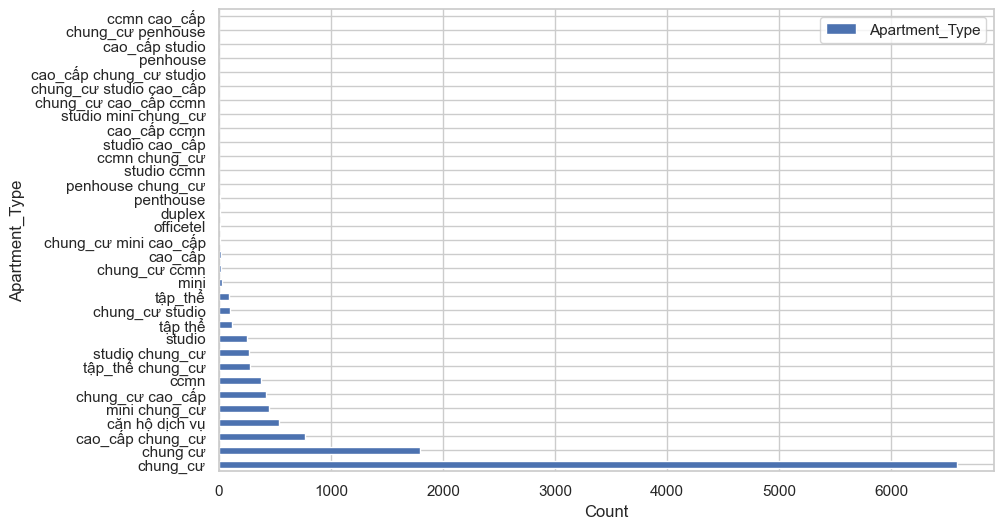

In [23]:
df['Apartment_Type'].value_counts().to_frame().plot.barh(figsize=(10, 6))
plt.xlabel('Count')
plt.ylabel('Apartment_Type')

# Some duplicate apartment type in the dataset

In [24]:
print(df['Apartment_Type'].unique())

['t·∫≠p th·ªÉ' 'chung_c∆∞' 't·∫≠p_th·ªÉ chung_c∆∞' 'studio' 'ccmn' 'cƒÉn h·ªô d·ªãch v·ª•'
 'mini chung_c∆∞' 'chung c∆∞' 'studio chung_c∆∞' 'chung_c∆∞ cao_c·∫•p'
 'chung_c∆∞ studio cao_c·∫•p' 'mini' 'penthouse' 'chung_c∆∞ ccmn' 'duplex'
 'studio mini chung_c∆∞' nan 't·∫≠p_th·ªÉ' 'cao_c·∫•p' 'penhouse chung_c∆∞'
 'chung_c∆∞ mini cao_c·∫•p' 'cao_c·∫•p chung_c∆∞' 'officetel' 'cao_c·∫•p ccmn'
 'studio cao_c·∫•p' 'studio ccmn' 'chung_c∆∞ cao_c·∫•p ccmn' 'chung_c∆∞ studio'
 'cao_c·∫•p chung_c∆∞ studio' 'penhouse' 'cao_c·∫•p studio' 'ccmn chung_c∆∞'
 'chung_c∆∞ penhouse' 'ccmn cao_c·∫•p']


In [25]:
# normalize apartment type into consistent list
# chung c∆∞ cao c·∫•p == luxury apartment
# chung c∆∞ studio == studio apartment
# chung c∆∞ mini == mini apartment
# chung c∆∞ t·∫≠p th·ªÉ == collective apartment
# chung c∆∞ th∆∞·ªùng == normal apartment
for i in range(df.shape[0]):
    if 'duplex' in str(df['Apartment_Type'][i]):
        df['Apartment_Type'][i] = 'chung c∆∞ cao c·∫•p'
    elif 'officetel' in str(df['Apartment_Type'][i]):
        df['Apartment_Type'][i] = 'chung c∆∞ cao c·∫•p'
    elif 'studio' in str(df['Apartment_Type'][i]):
        df['Apartment_Type'][i] = 'chung c∆∞ studio'
    elif 'penhouse' in str(df['Apartment_Type'][i]):
        df['Apartment_Type'][i] = 'chung c∆∞ cao c·∫•p'
    elif 'mini' in str(df['Apartment_Type'][i]) or 'ccmn' in str(df['Apartment_Type'][i]):
        df['Apartment_Type'][i] = 'chung c∆∞ mini'
    elif 't·∫≠p_th·ªÉ' in str(df['Apartment_Type'][i]) or 't·∫≠p th·ªÉ' in str(df['Apartment_Type'][i]):
        df['Apartment_Type'][i] = 'chung c∆∞ t·∫≠p th·ªÉ'
    else:
        df['Apartment_Type'][i] = 'chung c∆∞ th∆∞·ªùng'

In [26]:
df['Apartment_Type'].value_counts()

chung c∆∞ th∆∞·ªùng     14887
chung c∆∞ mini         891
chung c∆∞ studio       625
chung c∆∞ t·∫≠p th·ªÉ      488
chung c∆∞ cao c·∫•p       25
Name: Apartment_Type, dtype: int64

In [27]:
df['Apartment_Type'].isna().sum()

0

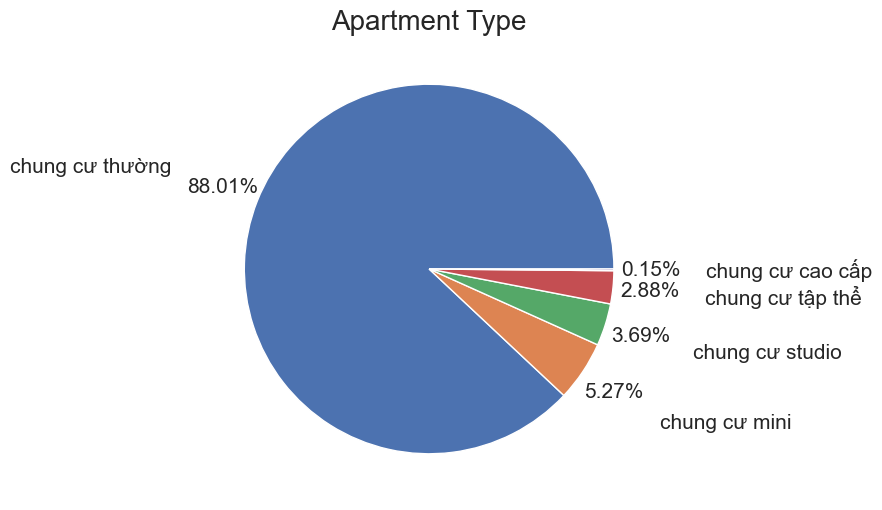

In [28]:
plt.subplots(figsize=(10,6))
df['Apartment_Type'].value_counts().plot(kind='pie', autopct='%1.2f%%', pctdistance=1.2, labeldistance=1.5, fontsize=15)
plt.axis('off')
plt.title('Apartment Type', fontsize=20)
plt.show()

## No Room Feature

In [29]:
print(df['No_Bedroom'].isnull().sum())

print(df['No_Bathroom'].isnull().sum())

print(df['No_Livingroom'].isnull().sum())

152
6073
12971


Text(0.5, 1.0, 'Box plot of bedroom number')

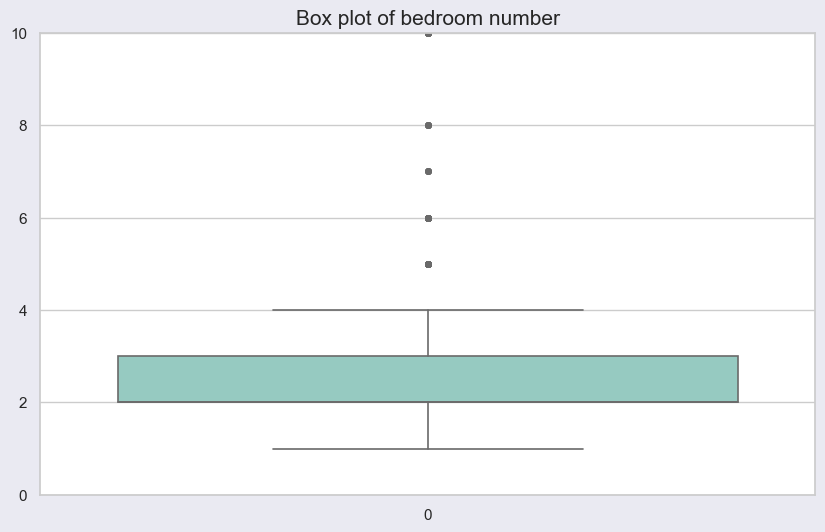

In [30]:
#  visualize boxplot of no bedroom
sns.set(style='whitegrid')
facecolor = '#eaeaf2'
fig, ax = plt.subplots(figsize=(10, 6), facecolor=facecolor)

# print(df['PRICE'].sort_values(ascending=False))

ax = sns.boxplot(data=df['No_Bedroom'],
                 palette='Set3',
                 linewidth=1.2,
                 fliersize=2,
                 showmeans=True,
                 flierprops=dict(marker='o', markersize=4))
ax.set(ylim=(0, 10))
ax.set_title('Box plot of bedroom number', fontsize=15)

In [31]:
df.query('No_Bedroom > 4')

Phone_Number      Poster  No_Bedroom  No_Bathroom  No_Livingroom   Area  \
127      085389***    c√° nh√¢n          5.0          5.0            NaN   30.0   
173      094709***    c√° nh√¢n          5.0          3.0            NaN   40.0   
426      097221***    c√° nh√¢n          5.0          4.0            NaN  125.0   
447      093396***    c√° nh√¢n          5.0          4.0            NaN  295.0   
529      082386***   m√¥i gi·ªõi         10.0          6.0            NaN   28.0   
...            ...         ...         ...          ...            ...    ...   
16714   0388644***    m√¥i gi·ªõi       401.0          NaN            NaN   30.0   
16775   0376389***    m√¥i gi·ªõi       203.0          NaN            NaN   30.0   
16776   0376389***    m√¥i gi·ªõi       502.0          NaN            NaN   62.0   
16777  03396644***    m√¥i gi·ªõi       501.0          1.0            NaN   35.0   
16816   0904559***    m√¥i gi·ªõi        80.0          1.0            NaN   80.0   

         Apartment_Type                                            Project  \
127       chung c∆∞ mini                                                NaN   
173    chung c∆∞ cao c·∫•p                                                NaN   
426     chung c∆∞ th∆∞·ªùng                                                NaN   
447     chung c∆∞ th∆∞·ªùng                               udic westlake t√¢y h·ªì   
529     chung c∆∞ th∆∞·ªùng                                                NaN   
...                 ...                                                ...   
16714   chung c∆∞ th∆∞·ªùng                                                NaN   
16775   chung c∆∞ th∆∞·ªùng                                                NaN   
16776   chung c∆∞ th∆∞·ªùng                                                NaN   
16777   chung c∆∞ th∆∞·ªùng                                                NaN   
16816   chung c∆∞ th∆∞·ªùng  cƒÉn h·ªô chung c∆∞ times city park hill (park hil...   

       Investor  Floor Furniture_Type  \
127         NaN    NaN           full   
173         NaN    NaN            unk   
426         NaN    NaN            unk   
447         NaN    NaN   full cao c·∫•p   
529         NaN    NaN            unk   
...         ...    ...            ...   
16714       NaN    4.0            unk   
16775       NaN    2.0           full   
16776       NaN    5.0            unk   
16777       NaN    5.0            unk   
16816       NaN    9.0           full   

                                               Furniture  \
127    ['s√†n g·ªógi∆∞·ªùng', ' t·ªßho√†', 'n√≥ng l·∫°nh', 'modem...   
173                                                   []   
426                                                   []   
447    ['b·∫øp', ' h√∫t m√πi', ' k·ªá', ' n√≥ng l·∫°nh', ' ƒëi·ªÅ...   
529          ['git·ªß', 'ƒë√¥', 'ti', 'm√°y_gi·∫∑t', 'm√°y_s·∫•y']   
...                                                  ...   
16714  ['ƒëi·ªÅu_ho√†', 'h√∫t m√π', 't·ªß qu·∫ßn_√°o', 'ban_c√¥ng...   
16775  ['kho√°', '<s>', 'm√°y_gi·∫∑t', 'ban_c√¥ng', 'b·∫øp t...   
16776  ['t·ªß qu·∫ßn_√°o', 'b·∫øp t·ª´', 't·ªß_l·∫°nh', 'ƒëi·ªÅu_ho√†'...   
16777  ['ƒëi·ªÅu_ho√†', 'n√≥ng l·∫°nh', 't·ªß_l·∫°nh', 'm√°y_gi·∫∑t...   
16816                                                 []   

                                              Convenient  Price  \
127                           ['ƒë·ªÉ xe', 'qu√°n ƒÉ', 'ch·ª£']    3.8   
173                                      ['<s>', '</s>']   13.0   
426                                                   []    6.5   
447                                                   []   48.0   
529    ['ƒë·∫°i_h·ªçc c√¥ng_nghi·ªáp 32 10c·∫ßu di·ªÖn', ' h·ªì_t√πn...    3.3   
...                                                  ...    ...   
16714  ['si√™u_th·ªã', 'h·ªì tr√∫c b·∫°ch', 'c√¥ng_vi√™n', 'tha...    7.5   
16775  ['b·∫£o_v·ªá', 'giao_th√¥ng thu·∫≠n_ti·ªán vui_ch∆°i', '...    7.0   
16776  ['h·ªì ho√†n_ki·∫øm', 'tr∆∞·ªùng_h·ªçc', 'ƒëi·ªÉm qƒëa', 'c·ªô...   14.5   

##  Relation of some attributes

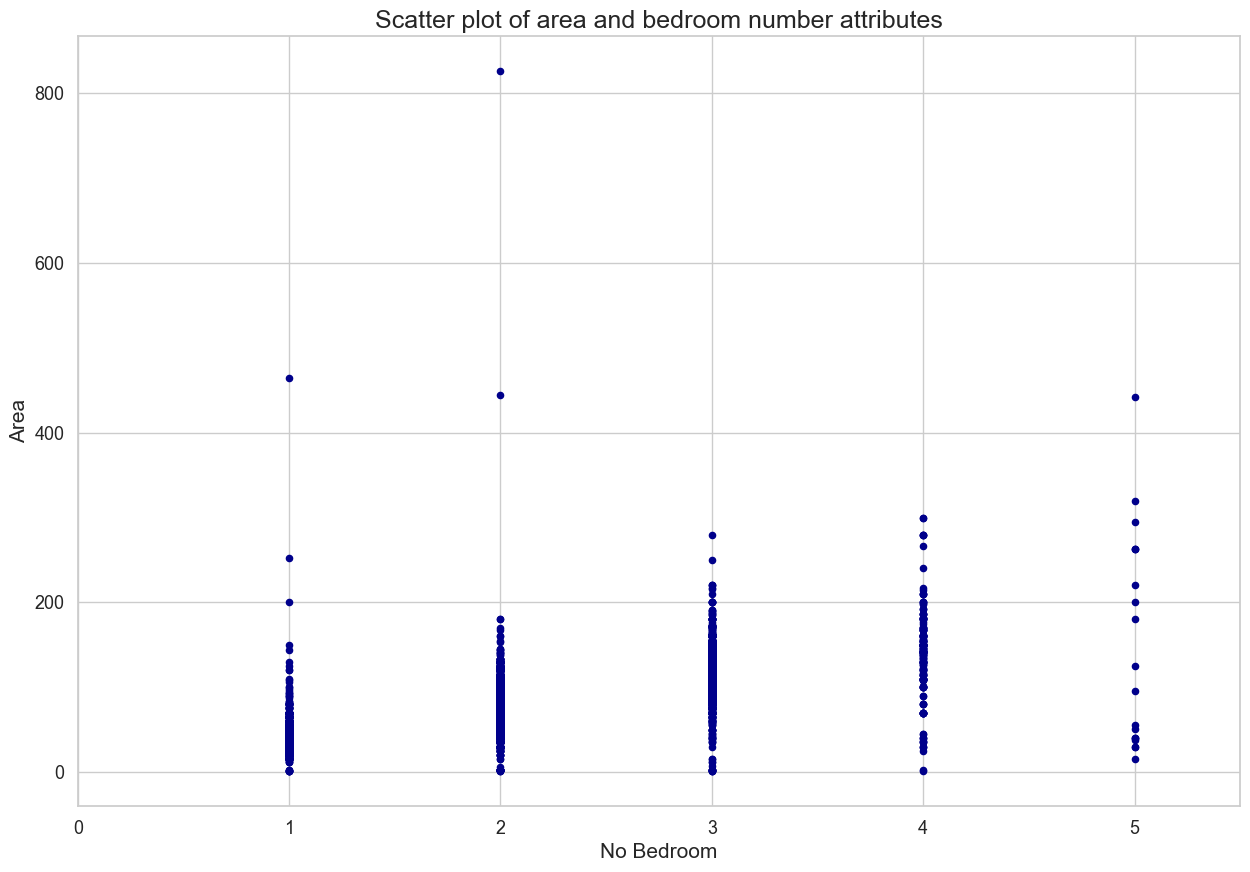

In [32]:
df.plot.scatter(x='No_Bedroom', y='Area', c='DarkBlue', figsize=(15, 10))
plt.title('Scatter plot of area and bedroom number attributes', fontsize=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlim(0, 5.5)
plt.xlabel('No Bedroom', fontsize=15)
plt.ylabel('Area', fontsize=15)
plt.show()

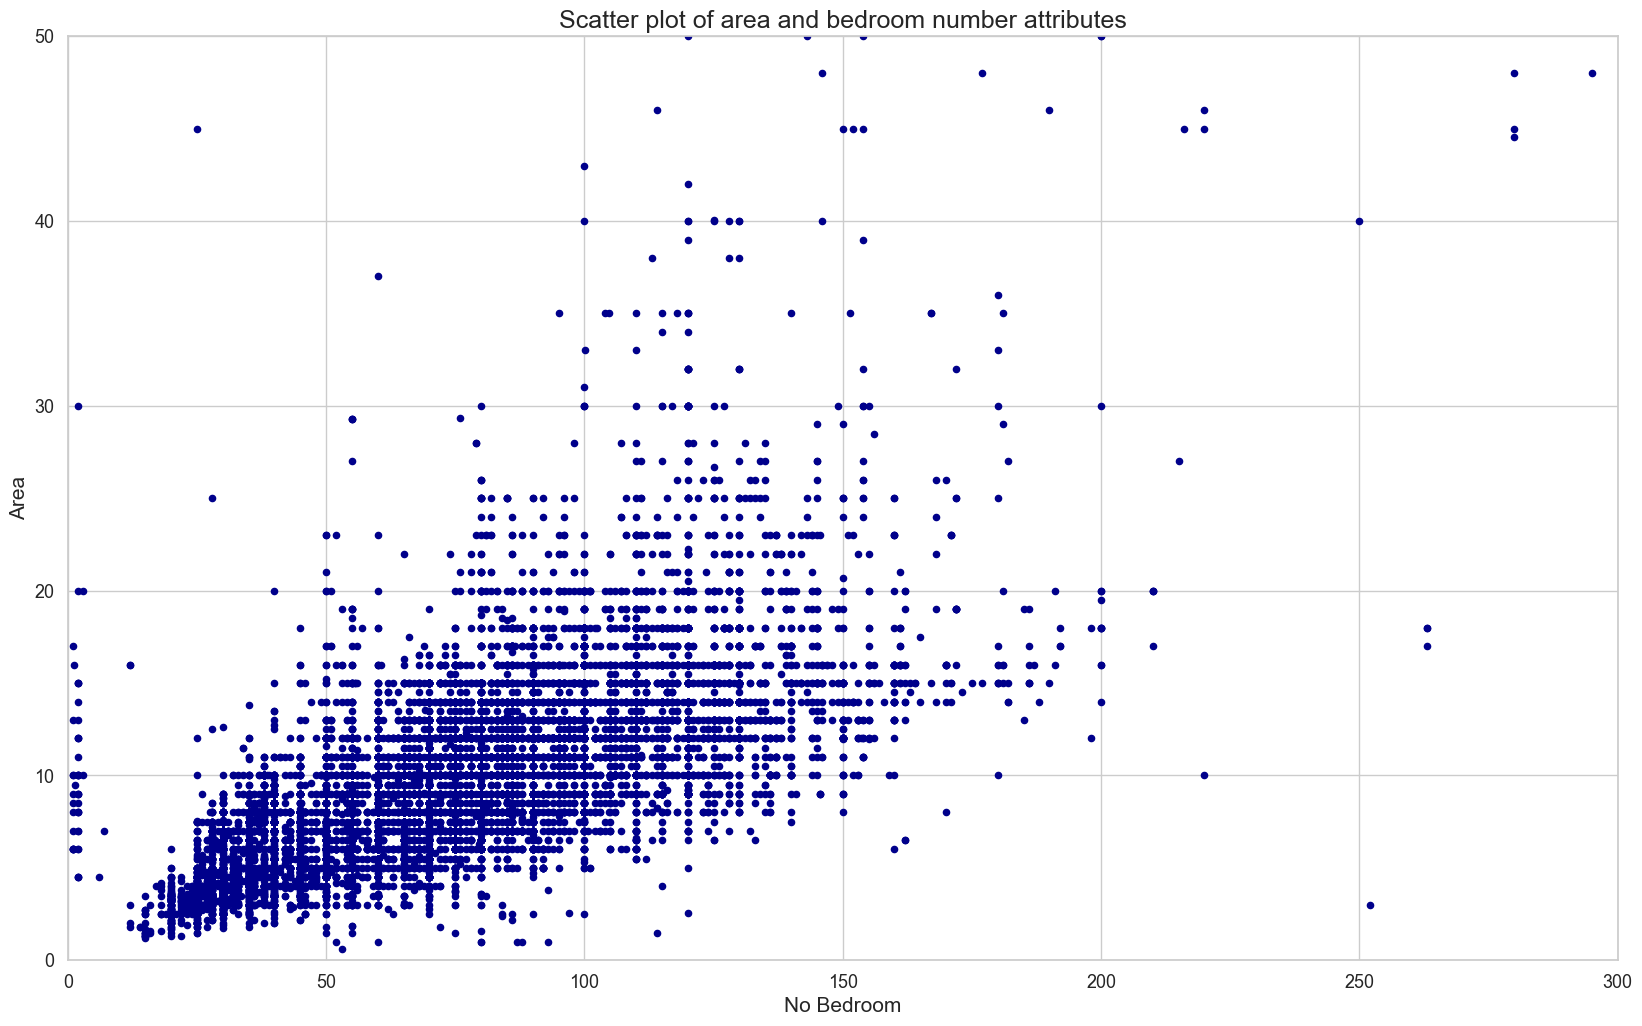

In [33]:
df.plot.scatter(x='Area', y='Price', c='DarkBlue', figsize=(20, 12))
plt.title('Scatter plot of area and bedroom number attributes', fontsize=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlim(0, 300)
plt.ylim(0, 50)
plt.xlabel('No Bedroom', fontsize=15)
plt.ylabel('Area', fontsize=15)
plt.show()

### Correlation and describe

In [34]:
df['No_Bedroom'] = df['No_Bedroom'].astype("float")
df['No_Bathroom'] = df['No_Bathroom'].astype("float")

In [35]:
df.drop(columns=['Investor'], inplace=True)

In [36]:
non_num_cols = [col for col in df.columns if df[col].dtype == 'O']
non_num_data = df[non_num_cols]

In [37]:
num_cols = list(set(df.columns) - set(non_num_cols))
num_cols

['No_Bathroom',
 'No_Livingroom',
 'Latitude',
 'Area',
 'No_Bedroom',
 'Longitude',
 'Floor',
 'Price']

In [38]:
df_num = df[num_cols]
df_num.describe()

No_Bathroom  No_Livingroom      Latitude          Area    No_Bedroom  \
count  10843.000000    3945.000000  16328.000000  16900.000000  16764.000000   
mean       1.551877       1.001014     21.007864     74.482237     12.182594   
std        0.563900       0.038991      0.449452     33.162276     62.000436   
min        1.000000       1.000000     10.224782      1.000000      1.000000   
25%        1.000000       1.000000     21.002553     50.000000      2.000000   
50%        2.000000       1.000000     21.017417     72.000000      2.000000   
75%        2.000000       1.000000     21.034394     93.000000      3.000000   
max        6.000000       3.000000     49.304258    826.000000    926.000000   

          Longitude        Floor          Price  
count  16328.000000  5596.000000   16724.000000  
mean     105.788384    12.477127      58.358730  
std        2.382765    28.512939    6226.249488  
min     -123.144252     1.000000       0.625000  
25%      105.785437     4.000000       6.500000  
50%      105.804033    10.000000       9.000000  
75%      105.824155    16.000000      12.000000  
max      109.157551   707.000000  805194.333333

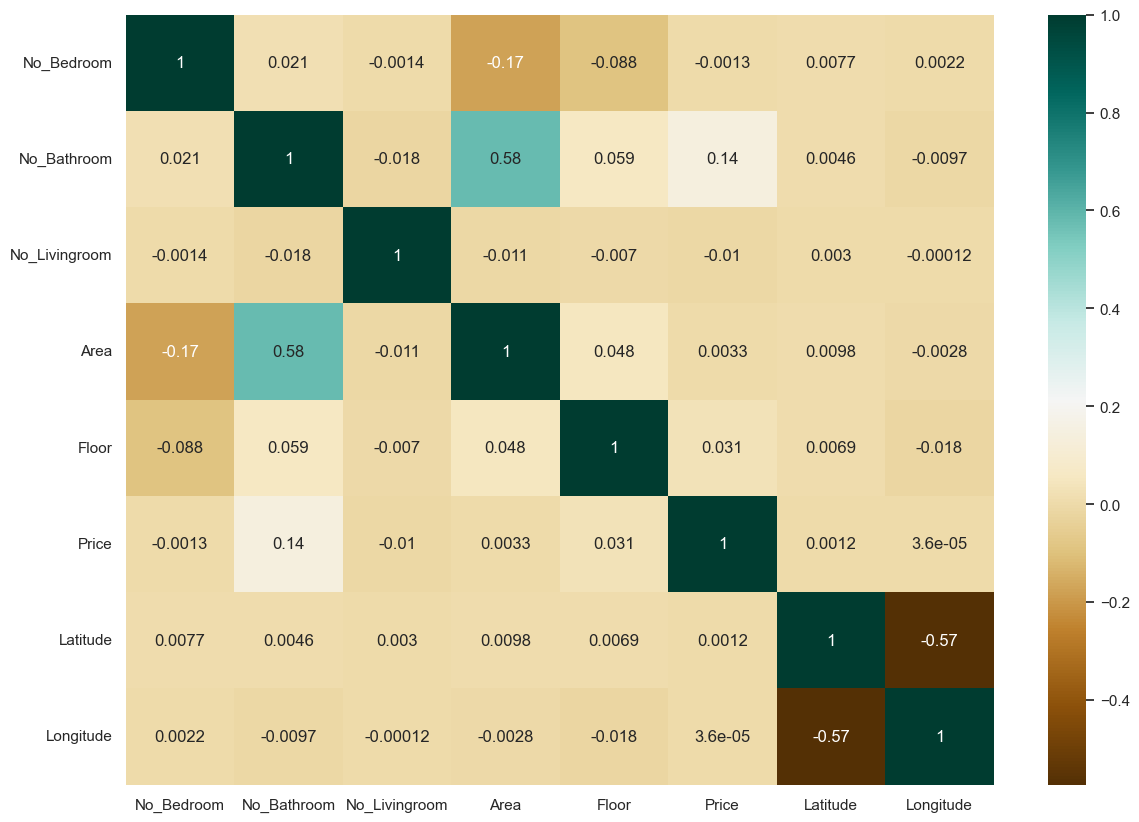

In [39]:
# correlation
plt.figure(figsize = (14,10))
g = sns.heatmap(df.corr(), cmap = 'BrBG', annot = True)

[(105.7, 106.0)]

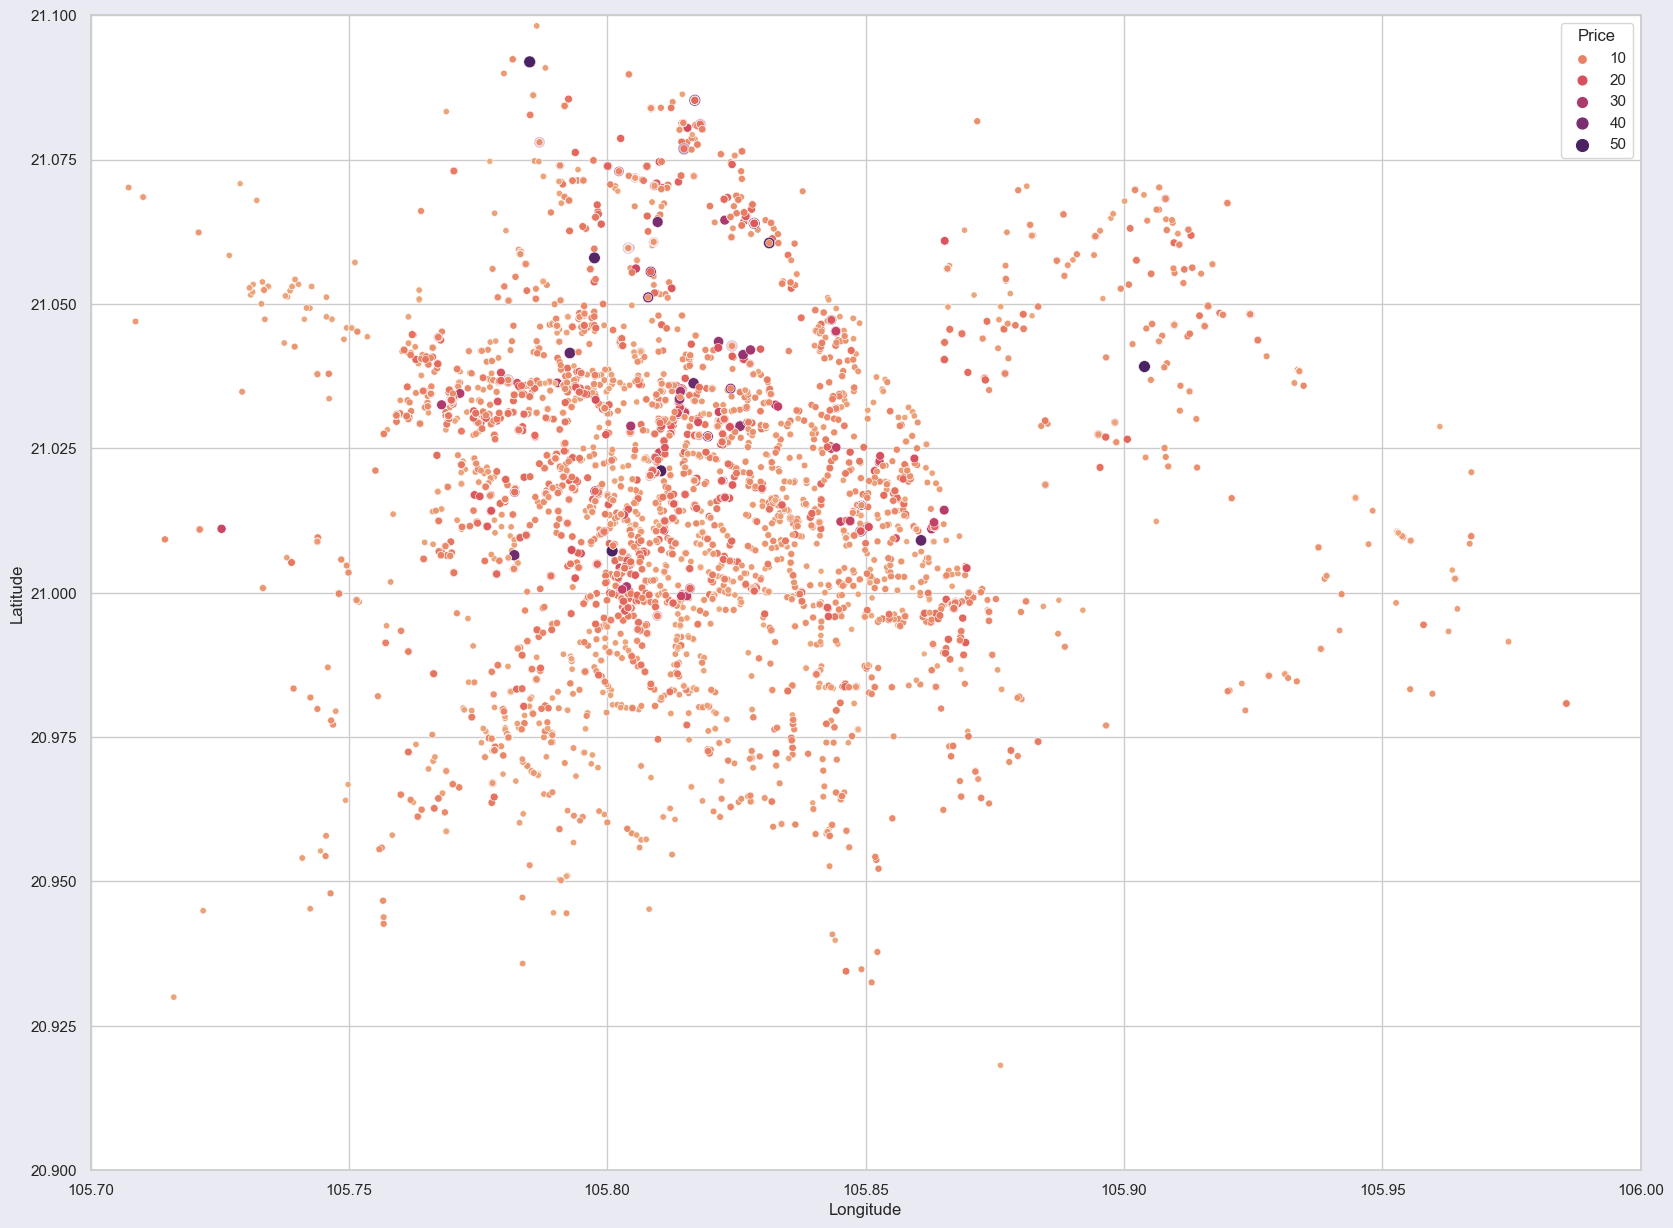

In [40]:
sns.set(style='whitegrid')
facecolor = '#eaeaf2'
fig, ax = plt.subplots(figsize=(20, 15), facecolor=facecolor)

# ax = sns.scatterplot(x=dropped_df['LATITUDE'], y=dropped_df['LONGITUDE'], hue=dropped_df['PRICE'], palette='winter')
ax = sns.scatterplot(data=df[df['Price'] <= 50], x='Longitude', y='Latitude', hue='Price', size='Price', palette='flare')
ax.set(ylim=(20.9,21.1))
ax.set(xlim=(105.7,106))

# Data cleaning

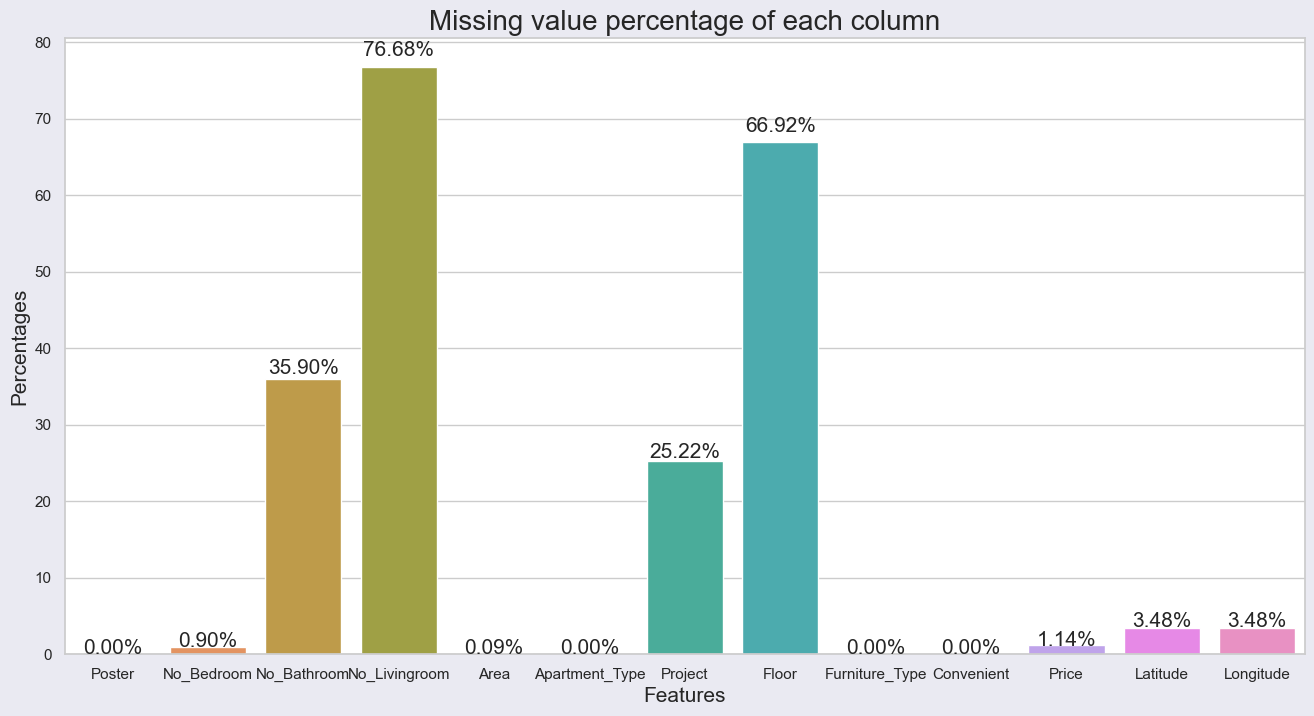

In [41]:
# visualize percentage of missing value after some preprocess steps
def missing_percent(df):
    nan_percent= 100 * (df.isnull().sum()/len(df))
    # nan_percent= nan_percent[nan_percent>0]
    return nan_percent

nan_percent= missing_percent(df)
nan_percent

bar_x = []
bar_y = []
for x in list(nan_percent.items()):
  if x[0] not in ['Investor', 'Phone_Number', 'Raw_Description', 'Location', 'Furniture', 'Convinient', 'Entities', 'Url']:
    bar_x.append(x[0])
    bar_y.append(x[1])

sns.set(style='whitegrid')
facecolor = '#eaeaf2'
fig, ax = plt.subplots(figsize=(16, 8), facecolor=facecolor)
ax = sns.barplot(x=bar_x, y = bar_y)
ax.set_title('Missing value percentage of each column', fontsize=20)
ax.set_xlabel('Features', fontsize=15)
ax.set_ylabel('Percentages', fontsize=15)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height*1.02), ha='center', fontsize=15)

In [42]:
# remove rows that have nan value in some columns such as: Area, No Bedroom, Price, Latitude, Longitude
df.dropna(axis=0, subset=['No_Bedroom', 'Area', 'Price', 'Latitude', 'Longitude'], inplace=True)

In [43]:
# remove outlier rows

# remove rows that have price > 50 million vietnamdong
df = df.loc[df['Price'] <= 50]

# remove rows that have no bedroom > 4
df = df[~df['No_Bedroom'].isnull()]
df = df.loc[df['No_Bedroom'] <= 4]

# remove rows that have Area not in range [15, 300]
df = df[~df['Area'].isnull()]
df = df.loc[df['Area'] <= 300]
df = df.loc[df['Area'] >= 15]

In [44]:
df.shape

(15382, 19)

# Feature engineering

In [45]:
# columns that have a large proportion of missing value will be dropped
# some unuseful columns also will be dropped

In [46]:
df = df.drop(
    columns=['Phone_Number', 'Project', 'Floor', 'Raw_Description', 'Location', 'Url', 'Entities', 'Convenient', 'Furniture', 'No_Livingroom', 'No_Bathroom'])

In [47]:
df.head()

Poster  No_Bedroom  Area    Apartment_Type Furniture_Type  Price  \
0   m√¥i gi·ªõi          3.0  80.0  chung c∆∞ t·∫≠p th·ªÉ            unk    7.5   
1    c√° nh√¢n          2.0  48.0   chung c∆∞ th∆∞·ªùng            unk    7.5   
2    c√° nh√¢n          1.0  40.0  chung c∆∞ t·∫≠p th·ªÉ            unk    5.0   
3   m√¥i gi·ªõi          1.0  30.0   chung c∆∞ studio           full    4.5   
4   m√¥i gi·ªõi          1.0  30.0   chung c∆∞ th∆∞·ªùng           full    4.5   

    Latitude   Longitude  
0  21.041731  105.809950  
1  21.008615  105.834091  
2  20.999548  105.860602  
3  21.032594  105.808742  
4  21.033861  105.809472

In [48]:
df.to_csv('data/cleaned_data.csv', index=False)

## Label encoding

In [49]:
df['Poster'] = df['Poster'].map(lambda x: x.strip(), na_action='ignore')
df['Poster'] = df['Poster'].map({'m√¥i gi·ªõi': 0, 'c√° nh√¢n': 1})

In [50]:
df['Apartment_Type'] = df['Apartment_Type'].map({'chung c∆∞ t·∫≠p th·ªÉ': 0, 'chung c∆∞ th∆∞·ªùng': 1, 'chung c∆∞ studio': 2, 'chung c∆∞ mini': 3, 'chung c∆∞ cao c·∫•p': 4})

In [52]:
df['Furniture_Type'] = df['Furniture_Type'].map({'unk': 0, 'full': 1, 'c∆° b·∫£n': 2, 'full cao c·∫•p': 3, 'nguy√™n b·∫£n': 4})

In [53]:
df.head()

Poster  No_Bedroom  Area  Apartment_Type  Furniture_Type  Price   Latitude  \
0       0         3.0  80.0               0               0    7.5  21.041731   
1       1         2.0  48.0               1               0    7.5  21.008615   
2       1         1.0  40.0               0               0    5.0  20.999548   
3       0         1.0  30.0               2               1    4.5  21.032594   
4       0         1.0  30.0               1               1    4.5  21.033861   

    Longitude  
0  105.809950  
1  105.834091  
2  105.860602  
3  105.808742  
4  105.809472

## Split train/val/test set

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train, test_size=0.1, random_state=42)

In [56]:
len(df_train), len(df_val), len(df_test)

(11074, 1231, 3077)

# Building model

In [62]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [58]:
y_train = df_train['Price']
X_train = df_train.drop(columns=['Price'], axis=1)

y_val = df_val['Price']
X_val = df_val.drop(columns=['Price'], axis=1)

## Baseline model: Decision Tree, Random Forest

In [59]:
decision_tree = DecisionTreeRegressor()

In [60]:
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [63]:
y_pred = decision_tree.predict(X_val)
print("Root MSE on the val set: {:.4f}".format(mean_squared_error(y_val, y_pred)**(1/2)))

Root MSE on the val set: 3.0623
